In [58]:
#importing the required libraries
import numpy as np
import tensorflow as tf
import seaborn as sn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [59]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()


In [60]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The training set contains 60k images and the testing set contains 10k images.

The training input vector is of the dimension [60000 X 28 X 28].

The training output vector is of the dimension [60000 X 1].

Each individual input vector is of the dimension [28 X 28].

Each individual output vector is of the dimension [1].

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

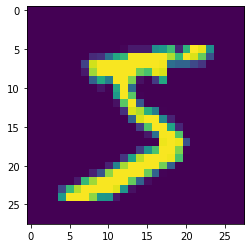

In [63]:
plt.imshow(np.squeeze(X_train[0]))
plt.show()

In [64]:
y_train[0]

5

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [66]:

#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

In [67]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1571 - accuracy: 0.9528
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.004

In [69]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0543 - accuracy: 0.9869


[0.05428331345319748, 0.9868999719619751]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

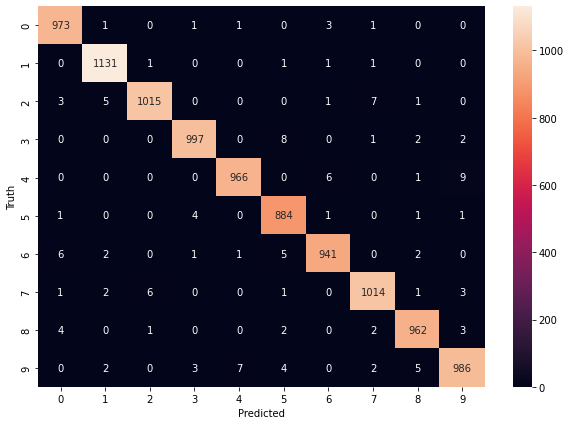

In [70]:

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')